In [143]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from random import randrange
from pylab import savefig

#Consider the size of lattice to be 100*100
m,n=100,100
# Let the number of people be 150
people=150    
# Let the maximum about of time for the disess to be 20 after that the person dies
L=20      
# discrete time-steps
MAX=350     
# total number of times the people moves
steps=70 

sick_ar = np.zeros(MAX+1)
    
sick, dead, iterate=0,0,0     
#For  the neighbors
neighbors=[]     

# Genetating a 2d lattice
Lat=nx.grid_2d_graph(m,n)      
nodes=[]
walkers={}
for i in Lat.nodes():
    nodes.append(i)
    walkers[i]=[]
    
# the number of infected people at a node at any temporal point 
nx.set_node_attributes(Lat,0,'infected')      
#the walkers at a node
nx.set_node_attributes(Lat,walkers,'walkers')         

x,y=np.zeros(people), np.zeros(people)    # walker coordinates
infect=np.zeros(people)              # walker current health status
lifespan=L*np.ones(people)           
total_sick=np.zeros(MAX)      # time series of sick walkers
#ts_dead=np.zeros(MAX)
totat_iter_count=np.zeros(MAX)       
highest_iter=0                 # The max count of iter 


# The following function is used to initialize the walker a the lattice nodes

def initialize():            
    for i in range(people):             
        
        ( x[i] , y[i] )= nodes[randrange(len(nodes))]
        Lat.nodes[ (x[i],y[i]) ]['walkers'].append(i)       # add this walker at node
    
   
    
# Move or say walk to the neighboring node
def walk(a):        
    for i in Lat.neighbors( (x[a],y[a]) ):
                neighbors.append(i)
    
    # remove a walker from node!
    Lat.nodes[(x[a],y[a])]['walkers'].remove(a)               
    ( x[a] , y[a] )=neighbors[randrange(len(neighbors))]
    # add him to the new node!
    Lat.nodes[(x[a],y[a])]['walkers'].append(a)



    
    
#  The bellow function does the work of killing the persion if the liftime is over
def kill(a):        
    infect[a]=2
    global sick,dead
    sick-=1
    dead+=1
                
    Lat.nodes[(x[a],y[a])]['walkers'].remove(a)

    
   

# The following function is used to infect a random walker a given node 
def infect_random():       
    
    while(True):
        tx,ty= nodes[randrange(len(nodes))]     
        temp=Lat.nodes[(tx,ty)]['walkers']         
        if (len(temp)!=0):
            break
    
    first_case=temp[randrange(len(temp))]   
    infect[first_case]=1
    Lat.nodes[(tx,ty)]['infected']+=1
    global sick
    sick=1

    
 
             
def actions(a):
    
    if infect[a]<2:     #still alive
            walk(a)
            
    if infect[a]==1:    #sick
        lifespan[a]-=1
        Lat.nodes[(x[a],y[a])]['infected']+=1           # so this guy is infected!
            
        if lifespan[a]<=0:  #go die!
            kill(a)
                
        for j in Lat.nodes[(x[a],y[a])]['walkers'] :        ##!
            if infect[j]==0 and j!=a: # healthy guy
                infect[j]=1     # infect him!
                
                global sick
                sick+=1
                Lat.nodes[(x[a],y[a])]['infected']+=1
      
# Resets all the attribute
def reset():
    global sick,dead,iterate
    sick,dead,iterate=0,0,0
    


In [144]:
# Creating the scenario

while(steps>0):        
    initialize()
    infect_random()         

    while(sick>0) and (iterate < MAX):
        for i in range(0,people):
            actions(i)
            neighbors.clear()
            
            
        total_sick[iterate]+=sick
        
        totat_iter_count[iterate]+=1
        iterate+=1 
        
    if (iterate>highest_iter) :
        highest_iter=iterate

  
    reset()
    steps-=1



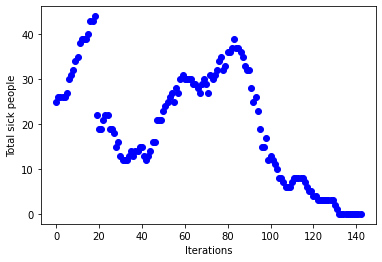

In [145]:
plt.plot(range(0,highest_iter+10),total_sick[0:highest_iter+10],"bo")
plt.ylabel('Total sick people')
plt.xlabel('Iterations')
plt.show()